In [1]:
 # Step 1: Import necessary libraries
import pandas as pd
from google.colab import files




In [2]:
# Step 2: Upload the CSV file
uploaded = files.upload()  # This will prompt you to upload the file





Saving updated_u2714523_DS7010_Credit.csv to updated_u2714523_DS7010_Credit.csv


In [3]:
# Step 3: Read the CSV file into a DataFrame
filename = list(uploaded.keys())[0]  # Automatically gets the uploaded file name
df = pd.read_csv(filename)




In [4]:

# Step 4: Display the first 5 rows of the dataset
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,160000,2,2,2,33,2,2,3,2,0,...,164310,162681,163005,15000,0,0,6100,12300,6100,0
1,150000,2,1,2,34,1,-1,-1,-2,-2,...,0,0,0,53,0,0,0,0,0,0
2,10000,1,2,1,50,1,2,0,0,0,...,8067,8227,8400,2,1281,1134,294,305,1000,0
3,220000,2,1,2,29,0,0,0,0,0,...,218513,131660,134346,9100,9000,7887,4800,4900,6000,1
4,310000,2,1,2,32,1,-2,-1,0,0,...,326,-235,-235,0,326,0,0,0,1200,0


In [5]:
# Step 1: Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n")
print(missing_values)




Missing values in each column:

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [6]:
# Step 2: Check total number of missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing}")







Total missing values in the dataset: 0


In [7]:
#remove ID
df = df.drop(columns=['ID'], errors='ignore')


/tmp/ipython-input-2082820224.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=["#3AA17E", "#FFCC00"])


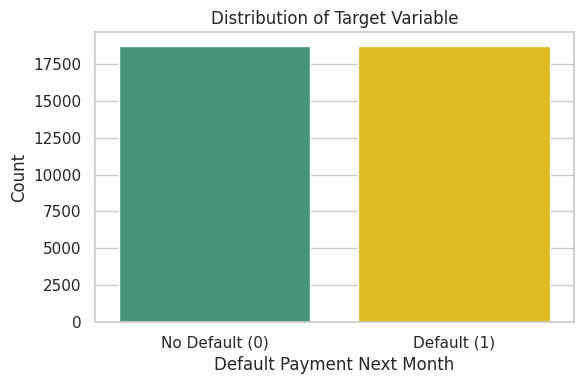

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class in the target variable
target_col = "default payment next month"
value_counts = df[target_col].value_counts()

# Bar plot using custom colors: red and pink––
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette=["#3AA17E", "#FFCC00"])

# Plot labels and title
plt.xlabel("Default Payment Next Month")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.xticks([0, 1], ["No Default (0)", "Default (1)"])

plt.tight_layout()
plt.show()


In [9]:
# Step 1: Install imbalanced-learn (only needs to be run once)
!pip install -U imbalanced-learn



In [10]:


# Step 2: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



In [11]:
# Step 3: Separate features and target
X = df.drop("default payment next month", axis=1)
y = df["default payment next month"]



In [12]:
# Step 4: Split into training and testing sets (SMOTE only on train data!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




In [13]:
# Step 5: Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [14]:

# Step 6: Check class distribution before and after SMOTE
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train_resampled).value_counts())

Before SMOTE:
 default payment next month
1    14953
0    14952
Name: count, dtype: int64

After SMOTE:
 default payment next month
1    14953
0    14953
Name: count, dtype: int64


/tmp/ipython-input-3944788274.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_resampled.value_counts().index,


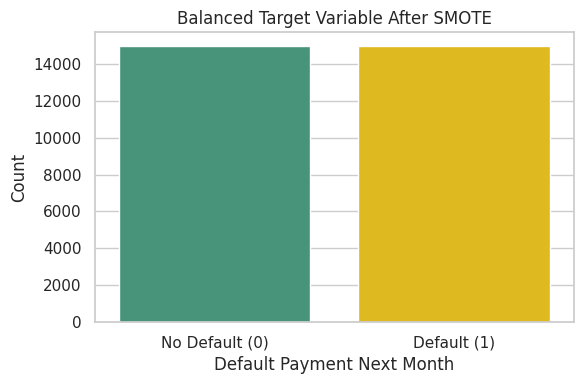

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot after SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=y_train_resampled.value_counts().index,
            y=y_train_resampled.value_counts().values,
            palette=["#3AA17E", "#FFCC00"])
plt.xlabel("Default Payment Next Month")
plt.ylabel("Count")
plt.title("Balanced Target Variable After SMOTE")
plt.xticks([0, 1], ["No Default (0)", "Default (1)"])
plt.tight_layout()
plt.show()


In [16]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [17]:
import pandas as pd


In [18]:
df_smote = pd.DataFrame(X_train_resampled, columns=X.columns)
df_smote['default payment next month'] = y_train_resampled.values

In [19]:
output_path = '/content/drive/MyDrive/Colab Notebooks/updated_u2714523_DS7010_Credit.csv'

In [20]:
df_smote.to_csv(output_path, index=False)
print(f"✅ SMOTE-resampled dataset saved to: {output_path}")

✅ SMOTE-resampled dataset saved to: /content/drive/MyDrive/Colab Notebooks/updated_u2714523_DS7010_Credit.csv


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
target = "default payment next month"



/tmp/ipython-input-3376993599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="LIMIT_BAL", data=df, palette=["#3AA17E", "#FFCC00"])


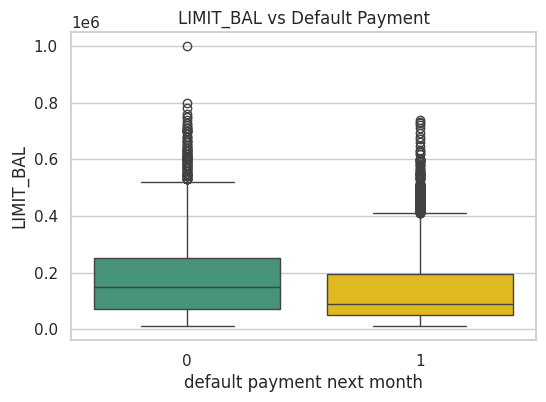

In [55]:
# 1. LIMIT_BAL vs Target (Box plot for numerical)
plt.figure(figsize=(6, 4))
sns.boxplot(x=target, y="LIMIT_BAL", data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("LIMIT_BAL vs Default Payment")
plt.show()



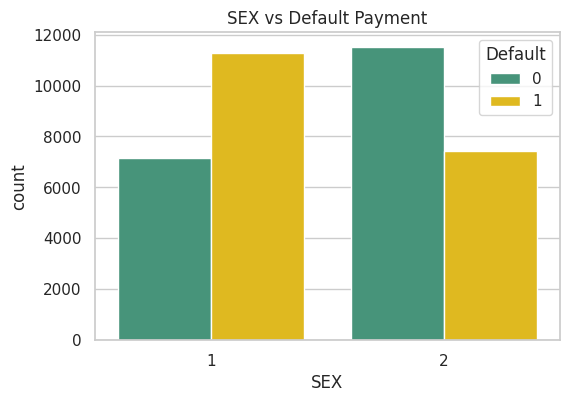

In [56]:
# 2. SEX vs Target (Count plot for categorical)
plt.figure(figsize=(6, 4))
sns.countplot(x="SEX", hue=target, data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("SEX vs Default Payment")
plt.legend(title="Default")
plt.show()



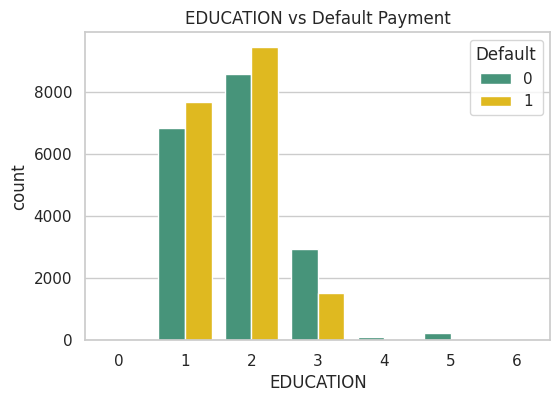

In [57]:
# 3. EDUCATION vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x="EDUCATION", hue=target, data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("EDUCATION vs Default Payment")
plt.legend(title="Default")
plt.show()



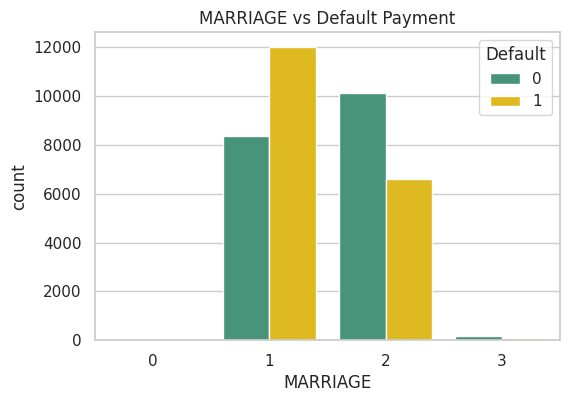

In [58]:
# 4. MARRIAGE vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x="MARRIAGE", hue=target, data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("MARRIAGE vs Default Payment")
plt.legend(title="Default")
plt.show()



/tmp/ipython-input-2493990432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="AGE", data=df, palette=["#3AA17E", "#FFCC00"])


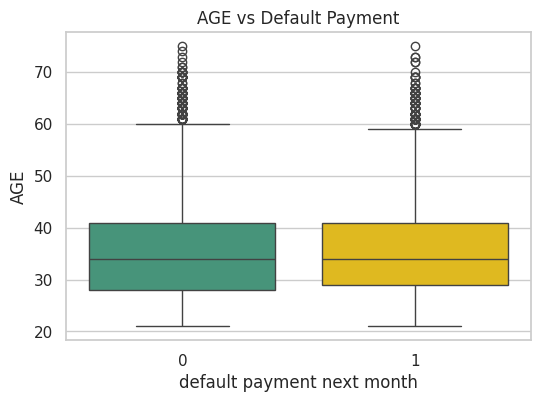

In [59]:
# 5. AGE vs Target (Box plot for numerical)
plt.figure(figsize=(6, 4))
sns.boxplot(x=target, y="AGE", data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("AGE vs Default Payment")
plt.show()


In [27]:
# Set plot style
sns.set(style="whitegrid")
target = "default payment next month"

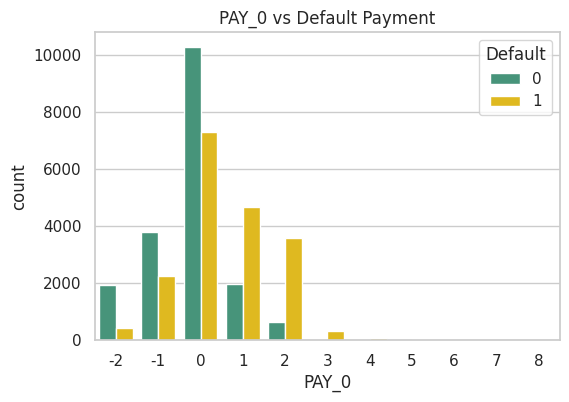

In [60]:
# 1. PAY_0 vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x="PAY_0", hue=target, data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_0 vs Default Payment")
plt.legend(title="Default")
plt.show()

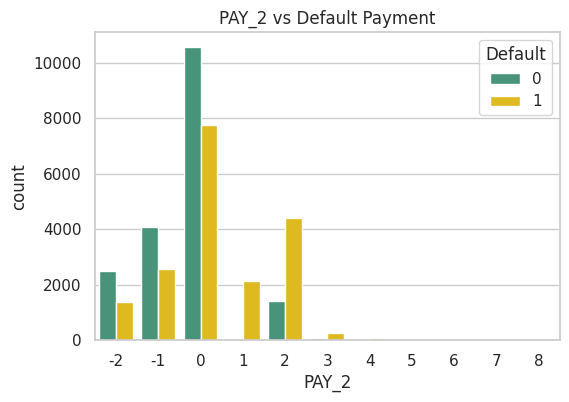

In [61]:
# 2. PAY_2 vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x="PAY_2", hue=target, data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_2 vs Default Payment")
plt.legend(title="Default")
plt.show()

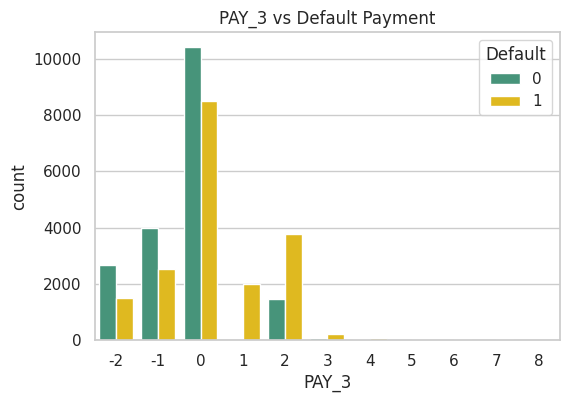

In [62]:
# 3. PAY_3 vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x="PAY_3", hue=target, data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_3 vs Default Payment")
plt.legend(title="Default")
plt.show()

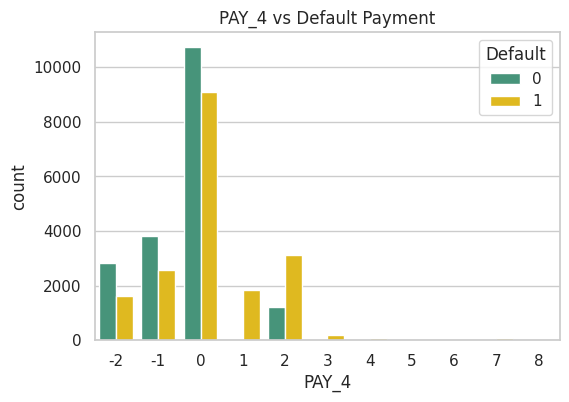

In [63]:
# 4. PAY_4 vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x="PAY_4", hue=target, data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_4 vs Default Payment")
plt.legend(title="Default")
plt.show()

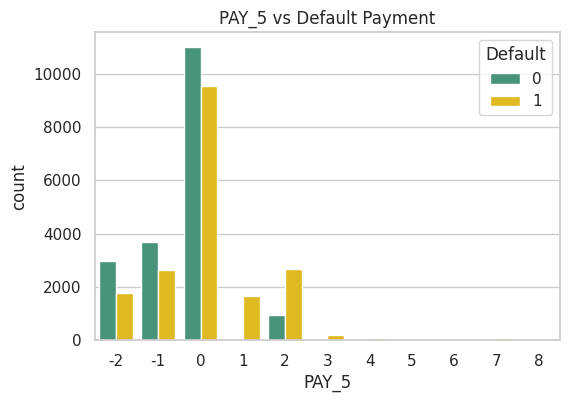

In [64]:
# 5. PAY_5 vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x="PAY_5", hue=target, data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_5 vs Default Payment")
plt.legend(title="Default")
plt.show()

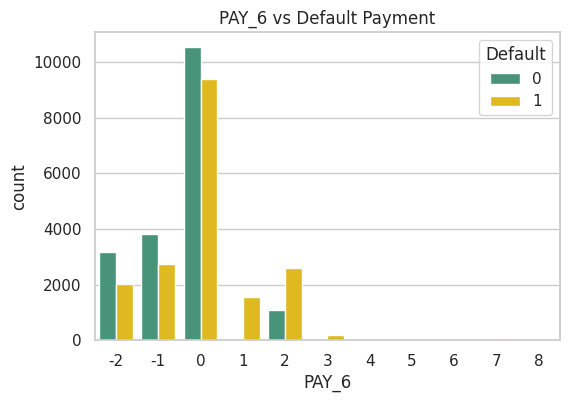

In [65]:
# 6. PAY_6 vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x="PAY_6", hue=target, data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_6 vs Default Payment")
plt.legend(title="Default")
plt.show()

In [34]:


# Set style

sns.set(style="whitegrid")

target = "default payment next month"



/tmp/ipython-input-1982256624.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="BILL_AMT1", data=df, palette=["#3AA17E", "#FFCC00"])


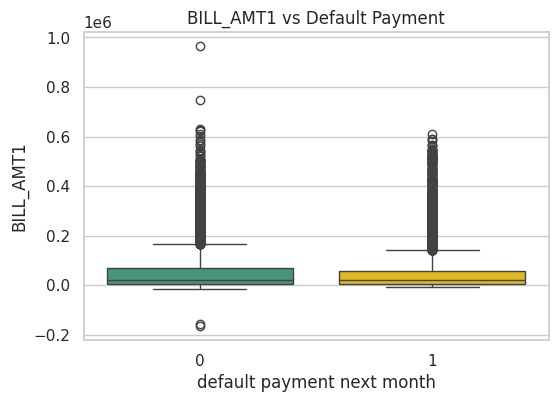

In [66]:
# 1. BILL_AMT1 vs Target

plt.figure(figsize=(6, 4))

sns.boxplot(x=target, y="BILL_AMT1", data=df, palette=["#3AA17E", "#FFCC00"])

plt.title("BILL_AMT1 vs Default Payment")

plt.show()



/tmp/ipython-input-644844816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="BILL_AMT2", data=df, palette=["#3AA17E", "#FFCC00"])


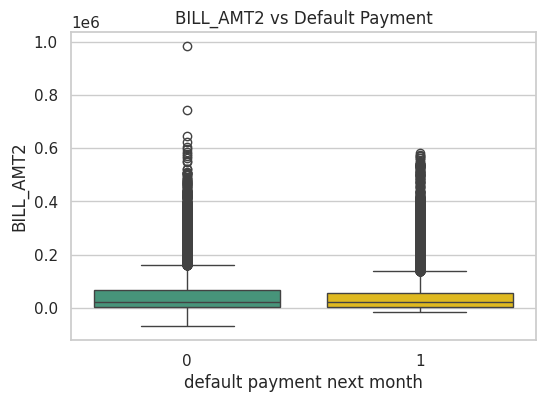

In [67]:
# 2. BILL_AMT2 vs Target

plt.figure(figsize=(6, 4))

sns.boxplot(x=target, y="BILL_AMT2", data=df, palette=["#3AA17E", "#FFCC00"])

plt.title("BILL_AMT2 vs Default Payment")

plt.show()



/tmp/ipython-input-4199424726.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="BILL_AMT3", data=df, palette=["#3AA17E", "#FFCC00"])


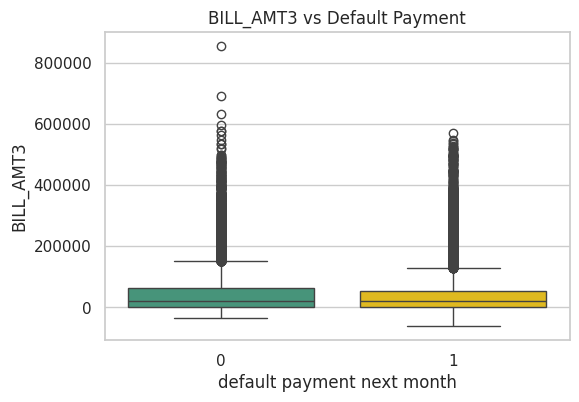

In [68]:
# 3. BILL_AMT3 vs Target

plt.figure(figsize=(6, 4))

sns.boxplot(x=target, y="BILL_AMT3", data=df, palette=["#3AA17E", "#FFCC00"])

plt.title("BILL_AMT3 vs Default Payment")

plt.show()



/tmp/ipython-input-4115507329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="BILL_AMT4", data=df, palette=["#3AA17E", "#FFCC00"])


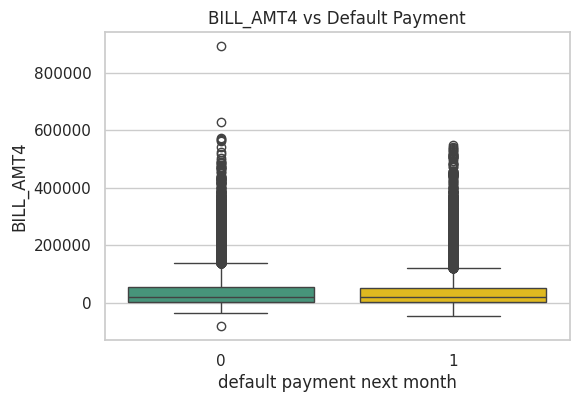

In [69]:
# 4. BILL_AMT4 vs Target

plt.figure(figsize=(6, 4))

sns.boxplot(x=target, y="BILL_AMT4", data=df, palette=["#3AA17E", "#FFCC00"])

plt.title("BILL_AMT4 vs Default Payment")

plt.show()





/tmp/ipython-input-3384780118.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="BILL_AMT5", data=df, palette=["#3AA17E", "#FFCC00"])


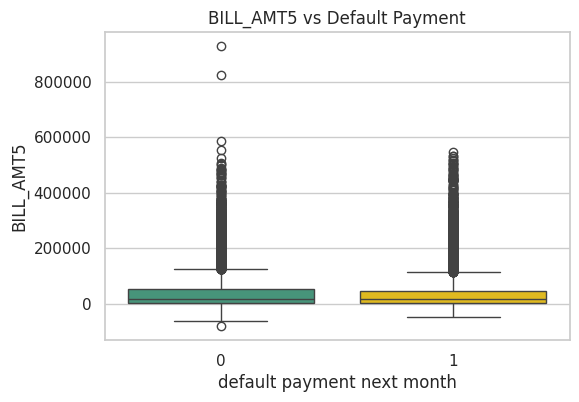

In [70]:
# 5. BILL_AMT5 vs Target

plt.figure(figsize=(6, 4))

sns.boxplot(x=target, y="BILL_AMT5", data=df, palette=["#3AA17E", "#FFCC00"])

plt.title("BILL_AMT5 vs Default Payment")

plt.show()



/tmp/ipython-input-1069931095.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="BILL_AMT6", data=df, palette=["#3AA17E", "#FFCC00"])


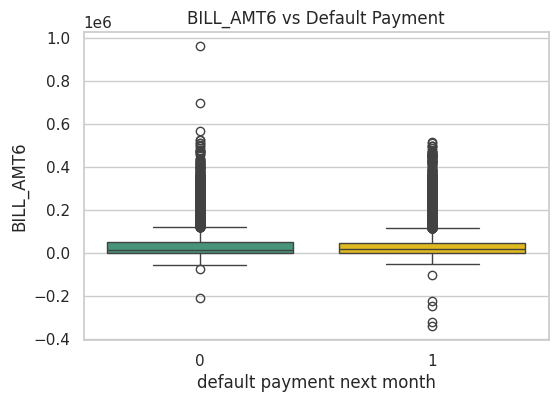

In [71]:
# 6. BILL_AMT6 vs Target

plt.figure(figsize=(6, 4))

sns.boxplot(x=target, y="BILL_AMT6", data=df, palette=["#3AA17E", "#FFCC00"])

plt.title("BILL_AMT6 vs Default Payment")

plt.show()

In [41]:
# Set plot style
sns.set(style="whitegrid")
target = "default payment next month"



/tmp/ipython-input-2601437252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="PAY_AMT1", data=df, palette=["#3AA17E", "#FFCC00"])


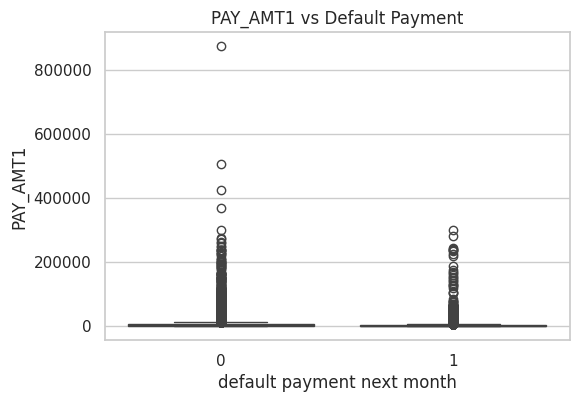

In [72]:
# 1. PAY_AMT1 vs Target
plt.figure(figsize=(6, 4))
sns.boxplot(x=target, y="PAY_AMT1", data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_AMT1 vs Default Payment")
plt.show()



/tmp/ipython-input-1164060064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="PAY_AMT2", data=df, palette=["#3AA17E", "#FFCC00"])


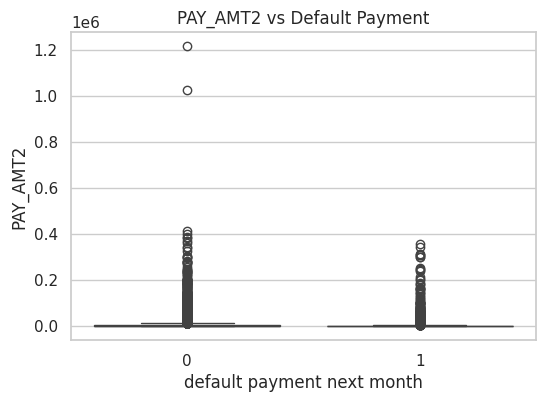

In [73]:
# 2. PAY_AMT2 vs Target
plt.figure(figsize=(6, 4))
sns.boxplot(x=target, y="PAY_AMT2", data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_AMT2 vs Default Payment")
plt.show()



/tmp/ipython-input-2728245403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="PAY_AMT3", data=df, palette=["#3AA17E", "#FFCC00"])


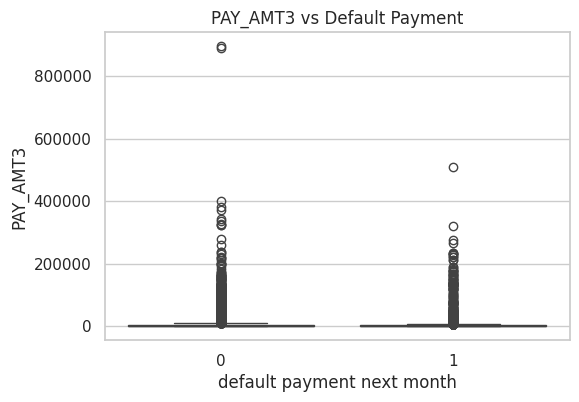

In [74]:
# 3. PAY_AMT3 vs Target
plt.figure(figsize=(6, 4))
sns.boxplot(x=target, y="PAY_AMT3", data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_AMT3 vs Default Payment")
plt.show()



/tmp/ipython-input-1717961058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="PAY_AMT4", data=df, palette=["#3AA17E", "#FFCC00"])


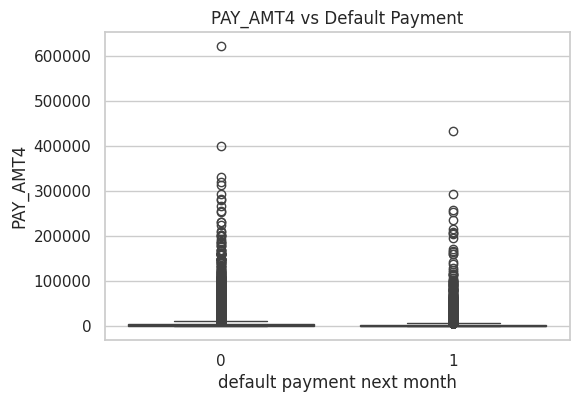

In [75]:
# 4. PAY_AMT4 vs Target
plt.figure(figsize=(6, 4))
sns.boxplot(x=target, y="PAY_AMT4", data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_AMT4 vs Default Payment")
plt.show()



/tmp/ipython-input-594801551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="PAY_AMT5", data=df, palette=["#3AA17E", "#FFCC00"])


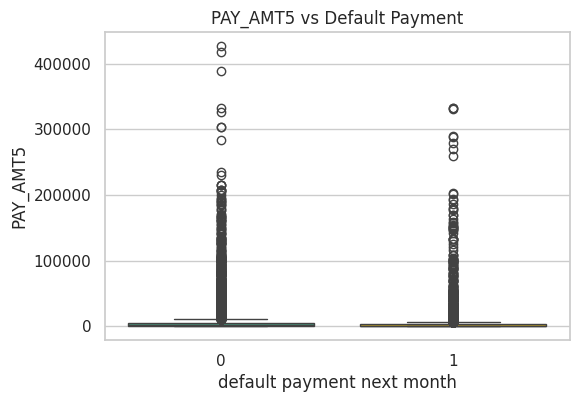

In [76]:
# 5. PAY_AMT5 vs Target
plt.figure(figsize=(6, 4))
sns.boxplot(x=target, y="PAY_AMT5", data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_AMT5 vs Default Payment")
plt.show()



/tmp/ipython-input-3754514341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y="PAY_AMT6", data=df, palette=["#3AA17E", "#FFCC00"])


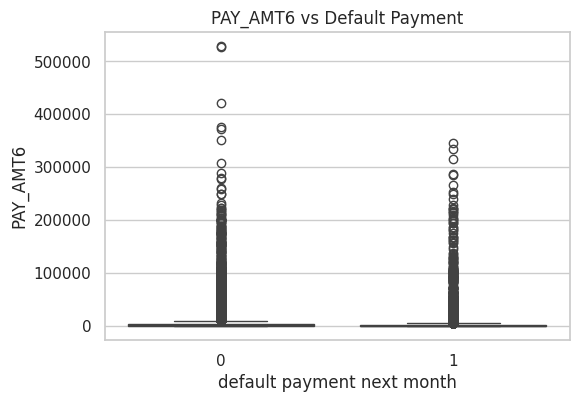

In [77]:
# 6. PAY_AMT6 vs Target
plt.figure(figsize=(6, 4))
sns.boxplot(x=target, y="PAY_AMT6", data=df, palette=["#3AA17E", "#FFCC00"])
plt.title("PAY_AMT6 vs Default Payment")
plt.show()

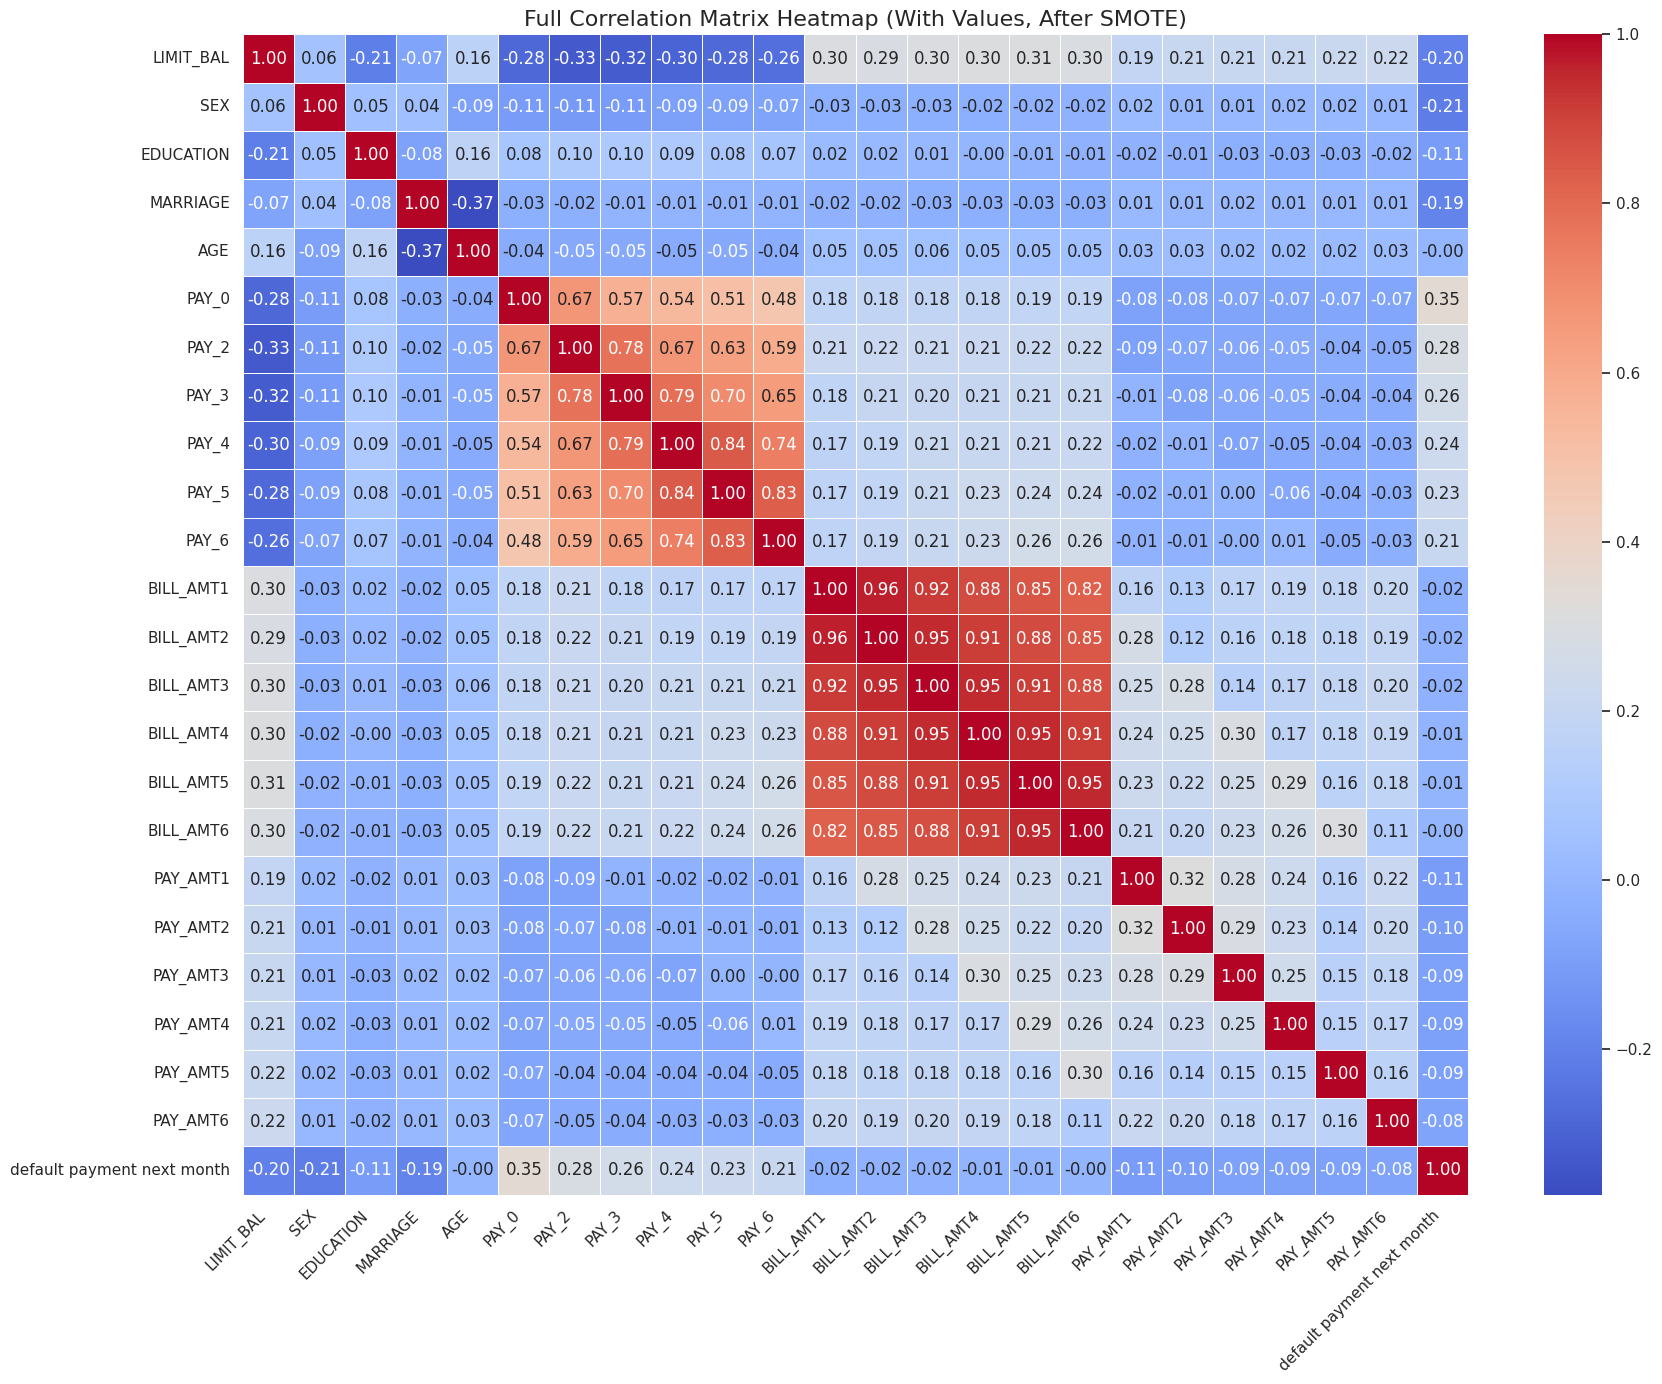

In [48]:
# Step 1: Combine resampled features and target into one DataFrame
df_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
df_resampled['default payment next month'] = y_train_resampled.values

# Step 2: Compute correlation matrix
corr_matrix = df_resampled.corr()

# Step 3: Plot full heatmap with correlation values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Full Correlation Matrix Heatmap (With Values, After SMOTE)", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [49]:
# Define selected columns
selected_columns = [
    "LIMIT_BAL", "SEX", "EDUCATION", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
    "default payment next month"
]

# Create a new DataFrame with selected variables
df_selected = df_resampled[selected_columns]

# Preview
df_selected.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,100000,1,2,44,0,0,0,-1,-1,0,...,1537,1642,110,1068,1007,1741,1646,100,0,1
1,80000,2,3,43,0,0,-2,-2,-1,-1,...,-11,2429,905,0,0,0,2440,905,9213,0
2,80000,1,1,32,-1,0,0,0,-1,-1,...,1156,1156,1469,1000,2000,0,1156,1469,0,0
3,50000,1,2,28,-1,-1,-1,0,-1,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
4,50000,2,1,27,0,0,0,0,0,2,...,34783,20570,20047,2223,1572,1700,1739,0,225,0


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Split into features and target
X = df_selected.drop("default payment next month", axis=1)
y = df_selected["default payment next month"]

In [51]:
# Step 3 (fixed): Convert each distribution to a DataFrame and label the source
df_full = y.value_counts(normalize=True).rename_axis("Class").reset_index(name="Proportion")
df_full["Dataset"] = "Full"

df_train = y_train.value_counts(normalize=True).rename_axis("Class").reset_index(name="Proportion")
df_train["Dataset"] = "Train"

df_test = y_test.value_counts(normalize=True).rename_axis("Class").reset_index(name="Proportion")
df_test["Dataset"] = "Test"

# Combine all into a single DataFrame
dist_df = pd.concat([df_full, df_train, df_test], ignore_index=True)

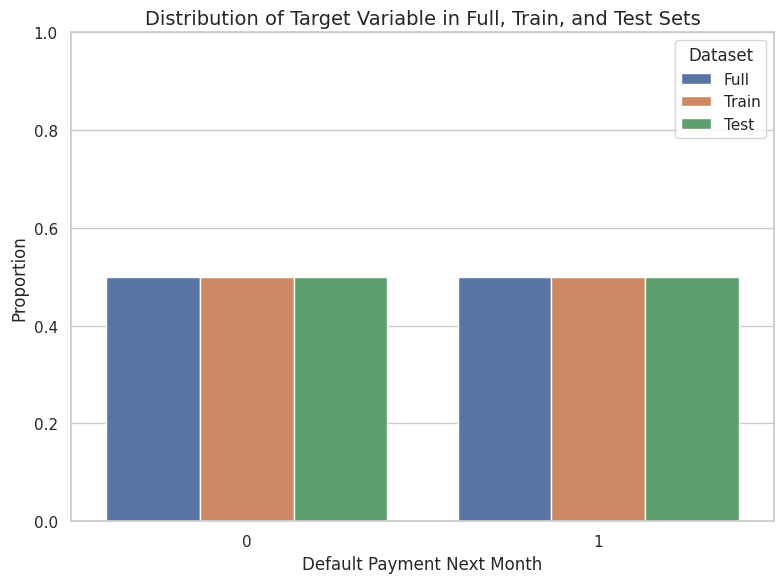

In [52]:
# Step 4: Plot distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=dist_df, x="Class", y="Proportion", hue="Dataset")
plt.title("Distribution of Target Variable in Full, Train, and Test Sets", fontsize=14)
plt.ylabel("Proportion")
plt.xlabel("Default Payment Next Month")
plt.ylim(0, 1)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()
